<a href="https://colab.research.google.com/github/sweety001/Image-Segmentation-using-K-means-clustring/blob/main/K_means_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = Image.open('/content/drive/MyDrive/DataSet/tiger.png')
img_np = np.asarray(img)
img_np[0:2]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]]], dtype=uint8)

In [ ]:
img_np.shape

(720, 1280, 3)

In [ ]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [ ]:
model=KMeans(n_clusters=30)
model.fit(pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pixel_centroids = model.labels_
cluster_centers=model.cluster_centers_
pixel_centroids


array([7, 7, 7, ..., 4, 4, 4], dtype=int32)

In [ ]:
cluster_centers

array([[ 97.82809534, 139.57160937,  85.34735288],
       [175.19265191, 175.86957136, 176.13407913],
       [ 50.66036867,  40.97998783,  35.50854258],
       [178.26677936, 131.57303398, 107.543868  ],
       [107.57596904, 107.61057634, 102.89243093],
       [230.12195046, 229.03728084, 229.21635365],
       [ 91.49851986,  88.56212997,  78.89536383],
       [152.39027769, 155.2200158 , 153.29685848],
       [136.91778833, 108.93551888,  84.07403701],
       [ 68.32467568,  66.55094118,  56.00043744],
       [129.0932207 , 132.91739543, 122.04135898],
       [107.31803346,  70.26151988,  44.03993729],
       [211.85978879, 169.07239643, 134.73897644],
       [ 24.39988021,  18.79944334,  16.54706079],
       [202.40015701, 200.05865295, 198.7052613 ],
       [ 58.0820354 , 124.689671  ,  40.66153228]])

In [ ]:
final=np.zeros((pixel_centroids.shape[0],3))
for cluster_no in range(16):
  final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[152.39027769, 155.2200158 , 153.29685848],
       [152.39027769, 155.2200158 , 153.29685848],
       [152.39027769, 155.2200158 , 153.29685848],
       [152.39027769, 155.2200158 , 153.29685848],
       [152.39027769, 155.2200158 , 153.29685848]])

In [ ]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [ ]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('/content/drive/MyDrive/DataSet/tiger_compressed.png')
img_1 = mpimg.imread('/content/drive/MyDrive/DataSet/tiger.png')
img_2 = mpimg.imread('/content/drive/MyDrive/DataSet/tiger_compressed.png')

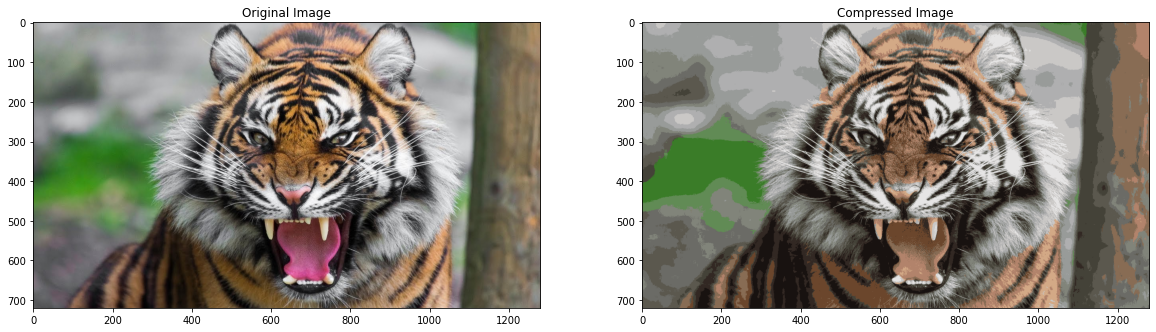

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()